In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_Train, Y_Train), (X_Test, Y_Test) = datasets.cifar10.load_data()

In [3]:
X_Train.shape

(50000, 32, 32, 3)

In [4]:
X_Test.shape

(10000, 32, 32, 3)

In [5]:
X_Train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
X_Train[0].shape

(32, 32, 3)

In [7]:
Y_Train.shape

(50000, 1)

In [8]:
Y_Train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
#Flatten the 2D Matrix
Y_Train = Y_Train.reshape(-1, )
Y_Test = Y_Test.reshape(-1, )
print(Y_Train[:6])
print(Y_Test[:6])

[6 9 9 4 1 1]
[3 8 8 0 6 6]


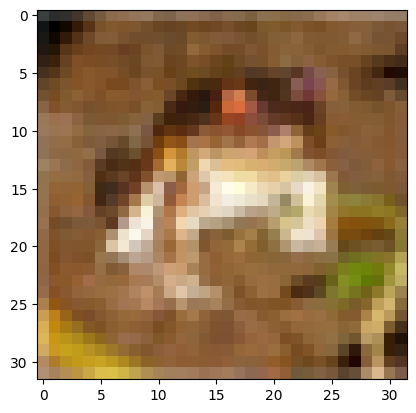

In [10]:
plt.imshow(X_Train[0])

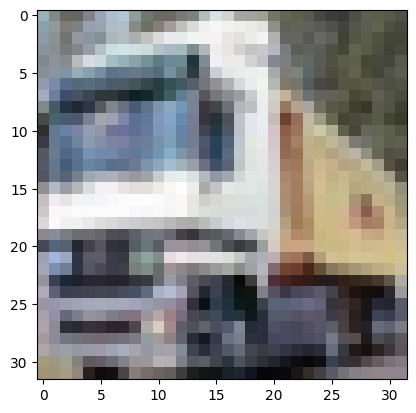

In [11]:
plt.imshow(X_Train[1])

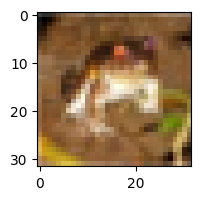

In [12]:
#Resize image
plt.figure(figsize = (15, 2))
plt.imshow(X_Train[0])

In [13]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

In [14]:
classes[9]

'truck'

In [15]:
#For quick data exploration:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

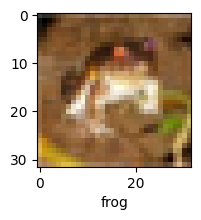

In [16]:
plot_sample(X_Train, Y_Train, 0)

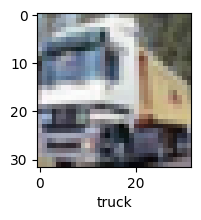

In [17]:
plot_sample(X_Train, Y_Train, 1)

In [18]:
Y_Test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [20]:
#Turns out the X and Y are corresponding, even Test ones

In [43]:
#Now, we normalize our data

In [19]:
X_Train = X_Train/255.0
X_Test = X_Test/255.0

In [47]:
#Simple Artifical Neural Network:

In [20]:
ANN = models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),  #Gives warnings
    tf.keras.layers.Dense(3000, activation = 'relu'),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'softmax')])

ANN.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
                          

In [21]:
ANN.fit(X_Train, Y_Train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 13s 6ms/step - loss: 1.8829 - accuracy: 0.3342
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6560 - accuracy: 0.4154
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5677 - accuracy: 0.4480
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5036 - accuracy: 0.4709
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4548 - accuracy: 0.4891


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
Y_Pred = ANN.predict(X_Test)
Y_Pred_Classes = [np.argmax(element) for element in Y_Pred]

print("Classification Report: \n", classification_report(Y_Test, Y_Pred_Classes))

313/313 [==============================] - 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.26      0.38      1000
           1       0.69      0.51      0.58      1000
           2       0.25      0.64      0.36      1000
           3       0.29      0.56      0.38      1000
           4       0.50      0.23      0.32      1000
           5       0.57      0.17      0.27      1000
           6       0.53      0.51      0.52      1000
           7       0.63      0.45      0.53      1000
           8       0.68      0.54      0.60      1000
           9       0.54      0.60      0.57      1000

    accuracy                           0.45     10000
   macro avg       0.54      0.45      0.45     10000
weighted avg       0.54      0.45      0.45     10000



In [55]:
print(Y_Pred[:5])  # Predicted probabilities
print(Y_Pred_Classes[:5])  # Predicted class labels
print(Y_Test[:5])  # True class labels

[[1.85991228e-02 2.06634048e-02 1.06320471e-01 2.81523794e-01
  4.36276086e-02 2.50158995e-01 2.18536392e-01 4.75962041e-03
  4.87434641e-02 5.26704034e-03 3.17519771e-05 2.48638698e-05
  1.82704389e-05 2.35505413e-05 2.43517934e-05 2.38293287e-05
  1.88197791e-05 2.23124989e-05 2.49386521e-05 2.74406539e-05
  2.38791490e-05 2.58974196e-05 2.41144498e-05 1.75580990e-05
  1.72167365e-05 1.74068118e-05 1.37370780e-05 7.41498798e-06
  1.47291767e-05 1.64489884e-05 2.71223034e-05 1.25744555e-05
  1.37909101e-05 1.71932752e-05 2.47813005e-05 1.56966325e-05
  3.13239543e-05 1.71720039e-05 1.81855903e-05 1.87422611e-05
  2.47899970e-05 2.23090319e-05 2.29143880e-05 1.65738729e-05
  2.18262903e-05 2.06697987e-05 1.54670633e-05 1.93512788e-05
  1.96062174e-05 1.86582092e-05 1.96860692e-05 1.89699185e-05
  1.43233965e-05 1.20741115e-05 2.85429087e-05 2.10054368e-05
  2.97175393e-05 1.22035699e-05 1.36128856e-05 2.58971013e-05
  2.12073446e-05 1.59131632e-05 9.46125783e-06 1.08523527e-05
  1.2527

In [85]:
#Now let us use CNN to improve performance of model

In [23]:
CNN = models.Sequential([
    #CNN Layer
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),  #Can detect 32 different features/edges
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),  #Can detect 32 different features/edges
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'),  #Can detect 32 different features/edges
    layers.MaxPooling2D((2, 2)),
    
    #Dense Layer, no need to specify space in middle layer
    layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])  #Softmax layer will normalize probability

In [59]:
'''
Sigmoid:
Class 1: 0.45
Class 2: 0.67

Softmax:
Class 1: (0.45)/(0.45 + 0.67)
Class 2: (0.67)/(0.45 + 0.67)

Sum always 1 of softmax
'''

'\nSigmoid:\nClass 1: 0.45\nClass 2: 0.67\n\nSoftmax:\nClass 1: (0.45)/(0.45 + 0.67)\nClass 2: (0.67)/(0.45 + 0.67)\n\nSum always 1 of softmax\n'

In [24]:
CNN.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [25]:
CNN.fit(X_Train, Y_Train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5195 - accuracy: 0.4463
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1382 - accuracy: 0.6010
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9885 - accuracy: 0.6554
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8876 - accuracy: 0.6924
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8189 - accuracy: 0.7170
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7545 - accuracy: 0.7378
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6999 - accuracy: 0.7558
Epoch 8/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6534 - accuracy: 0.7711
Epoch 9/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6131 - accuracy: 0.7850
Epoch 10/20
1563/1563 [==============================] - 10s 6ms/step - l

In [26]:
CNN.evaluate(X_Test, Y_Test)

313/313 [==============================] - 3s 7ms/step - loss: 1.1449 - accuracy: 0.7082


[1.1448612213134766, 0.7081999778747559]

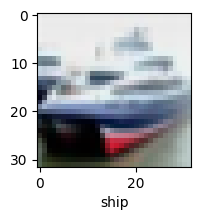

In [27]:
plot_sample(X_Test, Y_Test, 1)

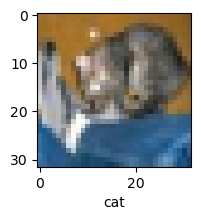

In [69]:
plot_sample(X_Test, Y_Test, 0)

In [63]:
#Now let's use the model to predict this and see how it performs

In [28]:
Y_Pred = CNN.predict(X_Test)
Y_Pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[2.52971731e-05, 5.18433467e-07, 1.68882878e-04, 1.83211833e-01,
        1.23243717e-06, 8.15825939e-01, 7.65406643e-04, 5.61613319e-07,
        2.64765646e-07, 3.95849534e-11],
       [1.67122018e-03, 4.45412487e-01, 4.84240701e-08, 9.67404490e-10,
        2.34610681e-07, 1.30997825e-11, 2.82370904e-09, 4.35767555e-09,
        5.51776767e-01, 1.13918469e-03],
       [8.14117026e-03, 8.83539140e-01, 3.72427144e-06, 3.52798845e-04,
        2.05306660e-05, 1.80275565e-05, 2.60047291e-05, 1.89239126e-05,
        5.29707037e-02, 5.49088567e-02],
       [9.99936342e-01, 1.07200740e-05, 8.05775642e-07, 4.07009029e-05,
        7.14274933e-08, 3.49988059e-11, 3.01553285e-07, 6.95661445e-11,
        9.81951234e-06, 1.28587601e-06],
       [1.42322428e-12, 4.80945873e-11, 9.02447198e-07, 1.17793779e-05,
        2.87926919e-03, 4.90417449e-08, 9.97107923e-01, 3.95584130e-12,
        6.02434325e-10, 2.43931806e-12]], dtype=float32)

In [73]:
#Values in each of these elements are probability distribution between zero and one. It's
#using SoftMax

In [75]:
np.argmax([5, 12, 18])

2

In [29]:
np.argmax(Y_Pred[0])

5

In [30]:
Y_Classes = [np.argmax(element) for element in Y_Pred]
Y_Classes[:5]

[5, 8, 1, 0, 6]

In [31]:
Y_Test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [83]:
#Okay so it prdicted first one as a cat correctly

In [32]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

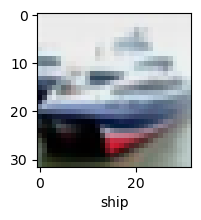

In [87]:
plot_sample(X_Test, Y_Test, 1)

In [89]:
classes[Y_Classes[1]]

'ship'

In [91]:
#Again correctly predicted ship

In [33]:
print("Classification Report: \n", classification_report(Y_Test, Y_Classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.68      0.72      1000
           1       0.79      0.85      0.82      1000
           2       0.59      0.60      0.60      1000
           3       0.54      0.52      0.53      1000
           4       0.66      0.68      0.67      1000
           5       0.67      0.57      0.62      1000
           6       0.79      0.73      0.76      1000
           7       0.71      0.81      0.76      1000
           8       0.80      0.83      0.81      1000
           9       0.76      0.81      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [95]:
#Better numbers. CNN also has less computation due to maxPooling